In [1]:

!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)

     |████████████████████████████████| 591.8 MB 615 bytes/s 
     |████████████████████████████████| 23.3 MB 1.2 MB/s 
     |████████████████████████████████| 23.3 MB 84.8 MB/s 
     |████████████████████████████████| 22.1 MB 97.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 17.4 MB 733 kB/s 
     |████████████████████████████████| 17.3 MB 150 kB/s 
     |████████████████████████████████| 12.8 MB 61.5 MB/s 
     |████████████████████████████████| 12.7 MB 66.0 MB/s 
     |████████████████████████████████| 11.8 MB 66.6 MB/s 
     |████████████████████████████████| 5.9 MB 52.1 MB/s 
     |████████████████████████████████| 6.6 MB 55.1 MB/s 
     |████████████████████████████████| 6.6 MB 19.9 MB/s 
     |████████████████████████████████| 4.0 MB 30.6 MB/s 
     |████████████████████████████████| 10.2 MB 33.4 MB/s 
     |████████████████████████████████| 10.1 MB 36.5 MB/s 
     |████████████████████████████████| 8.8 MB 56.3 MB/s 
   

1. Data Generation (Preparation)

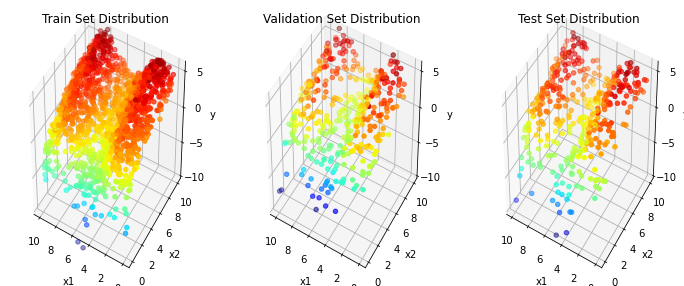

In [2]:
%matplotlib inline
#연속된 변수들을 보고 추측하는 문제라서 회귀문제이다.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# ====== Generating Dataset ====== #
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e
# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

2. Model Define

In [12]:
import torch
import torch.nn as nn

# Lab 2에서와 마찬가지로 나름대로의 MLP 모델을 구성하여 아래 시각화 결과와 같이 시각화하도록 하세요
class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        # ------------------빈 칸------------------#
        self.fc1=nn.Linear(2, 64) #입력은 x1, x2가 들어온다.
        self.fc2=nn.Linear(64, 32)
        self.fc3=nn.Linear(32, 16)
        self.fc4=nn.Linear(16, 1)
        self.relu=nn.ReLU()
        self.batch1 = nn.BatchNorm1d(64)     # batchnormalization 
        self.batch2 = nn.BatchNorm1d(32)
        self.batch3 = nn.BatchNorm1d(16)
        
        
        
        
        # -----------------------------------------#
    
    def forward(self, x):
        # ------------------빈 칸------------------#
        x=self.fc1(x)
        self.batch1 = nn.BatchNorm1d(64)
        x=self.relu(x)

       
        x=self.fc2(x)
        self.batch2 = nn.BatchNorm1d(32)
        x=self.relu(x)
        
        x=self.fc3(x)
        self.batch3 = nn.BatchNorm1d(16)
        x=self.relu(x)

        x=self.fc4(x)
        
        

        
        
        
        
        # -----------------------------------------#
        return x

3. Cost Function Define (Loss Function Define)

In [13]:
reg_loss = nn.MSELoss() #평균제곱 오차

4. Train & Evaluation

In [14]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error


model = MLPModel()
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 복잡해보이지만 간단히 모델 내에 학습을 당할 파라미터 수를 카운팅하는 코드입니다.


lr = 0.005 
optimizer = optim.SGD(model.parameters(), lr=lr) 


list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []


epoch = 4000 
for i in range(epoch):
    

    model.train() 
    optimizer.zero_grad() 
    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)

    
    loss = reg_loss(pred_y.squeeze(), true_y)
    loss.backward() 
    optimizer.step() 
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    

    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)   
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    


    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려봅니다.
        
        # ====== Calculate MAE ====== #
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y)
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        # ====== True Y Scattering ====== #
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        # ====== Predicted Y Scattering ====== #
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        # ====== Just for Visualizaing with High Resolution ====== #
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

Output hidden; open in https://colab.research.google.com to view.

5. Report Experiment

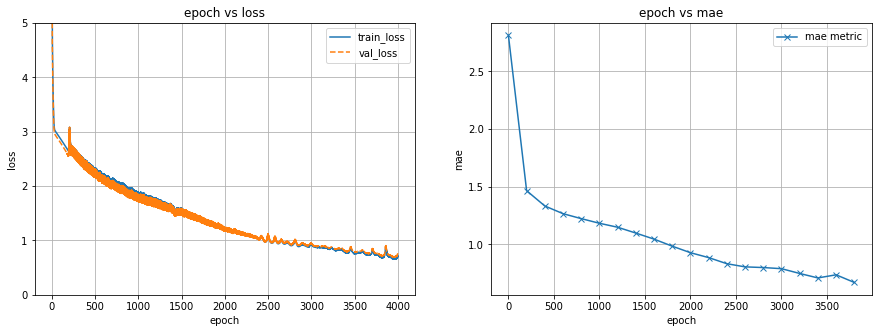

In [15]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()